<a href="https://colab.research.google.com/github/budatasci/ai-ml-workshop/blob/main/notebooks/02_feature_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering
Authors: Kolvin Liu, Wei Mai, Christina Xu

In [ ]:
# connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# import packages

# data manipulation
import pandas as pd
import numpy as np

# data splitting
from sklearn.model_selection import train_test_split

# data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# load the data 
data = pd.read_csv(...)
data.head()

# 1 Split the data into training and test data set

We split the data into a training and test data set to minimize overfitting. Overfitting occurs when we’ve fit the model too much to the training data. To prevent that we train on a subset of our data and test on our remaining data. 

In [ ]:
X_train, X_test, y_train, y_test = \
    train_test_split(data.drop(['Status'], axis=1),data['Status'], 
    test_size=0.20,
    random_state=42, 
    stratify=data['Status'])

# test_size indicates the percentage of the data that should be held over for testing
# random_state ensures that it always generates the same shuffled indicies
# stratify keeps the proportion of y values trhough the train and test sets

# 2 Scale Numeric Features
1. ML algorithms don't work well when numeric features have very different scales 
2. Apply either: 
    * MinMaxScaler bounds the values to a specific range (e.g. 0-1)
    * Standardization normalizes the features so that each feature will have μ = 0 and σ = 1

In [ ]:
# get numeric feature columns and store them in num
num = []
for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content): # check whether if column is numerical
        print(label)
        num.append(label)

Age
Tumor Size
Regional Node Examined
Reginol Node Positive
Survival Months


In [ ]:
def std_scaler(data):
    """
    Scales numeric features of data
    :param 1 data: a DataFrame
    :return: a scaled DataFrame
    """
    scaler = StandardScaler() # create a StandardScaler() instance
    X_num = data[num]         # select numeric features of the data
    O = scaler.fit_transform(X_num) # scale the numeric data
    P = pd.DataFrame(O, columns=X_num.columns, index=X_num.index)
    return P

In [ ]:
X_train_num = std_scaler(X_train) # apply to training set 
X_test_num = std_scaler(X_test) # apply to test set

# 3 Encode Categorical Features into Numeric Ones

1. ML algorithms can't interpret non-numeric features 
2. Apply:
    * Label Encoder - categorical features are ordinal i.e. if you are converting severity or ranking
    * One-Hot Encoding - categorical are non-ordinal 

## 3.1 Apply Label Encoder to Ordinal Categorical Features
T Stage, N Stage, 6th Stage, differentiate, Grade, A Stage are ordinal.

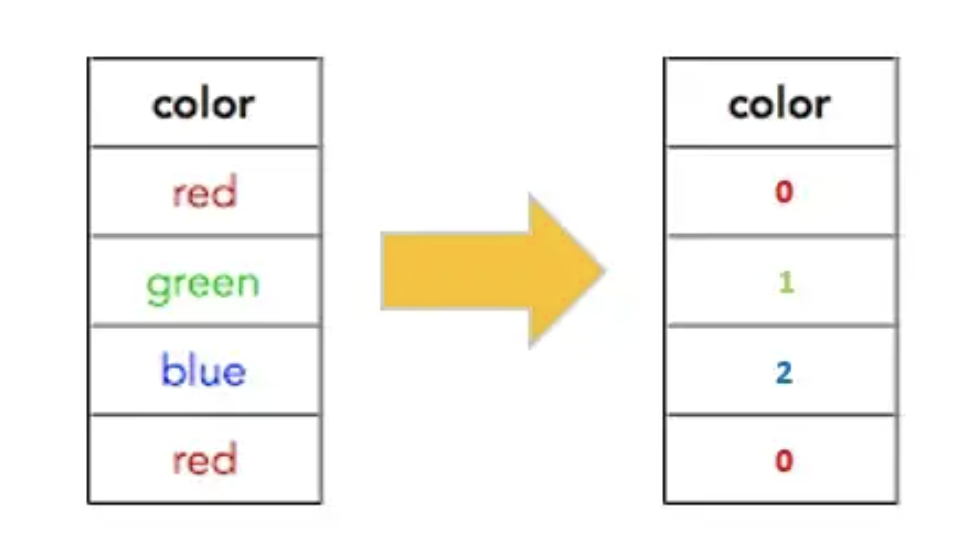

In [ ]:
def label_encoder(data, ordinal):
    """
    Transforms ordinal categorical features to numeric features 
    :param 1 data: a DataFrame
    :param 2 ordinal: oridinal categorical features
    :returns: a DataFrame of label encoded categorial features 
    """
    X_ord = data[ordinal].copy()
    for col in X_ord:
        X_ord[col] = LabelEncoder().fit_transform(data[col])
    return X_ord 

In [ ]:
ordinal = ['T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage'] 
X_train_ord = label_encoder(X_train, ordinal)
X_test_ord = label_encoder(X_test, ordinal)

## 3.2 Apply One Hot Encoding to Non-Ordinal Categorical Features
Race, Marital Status, Estrogen Status, and Progesterone Status are non-ordinal.

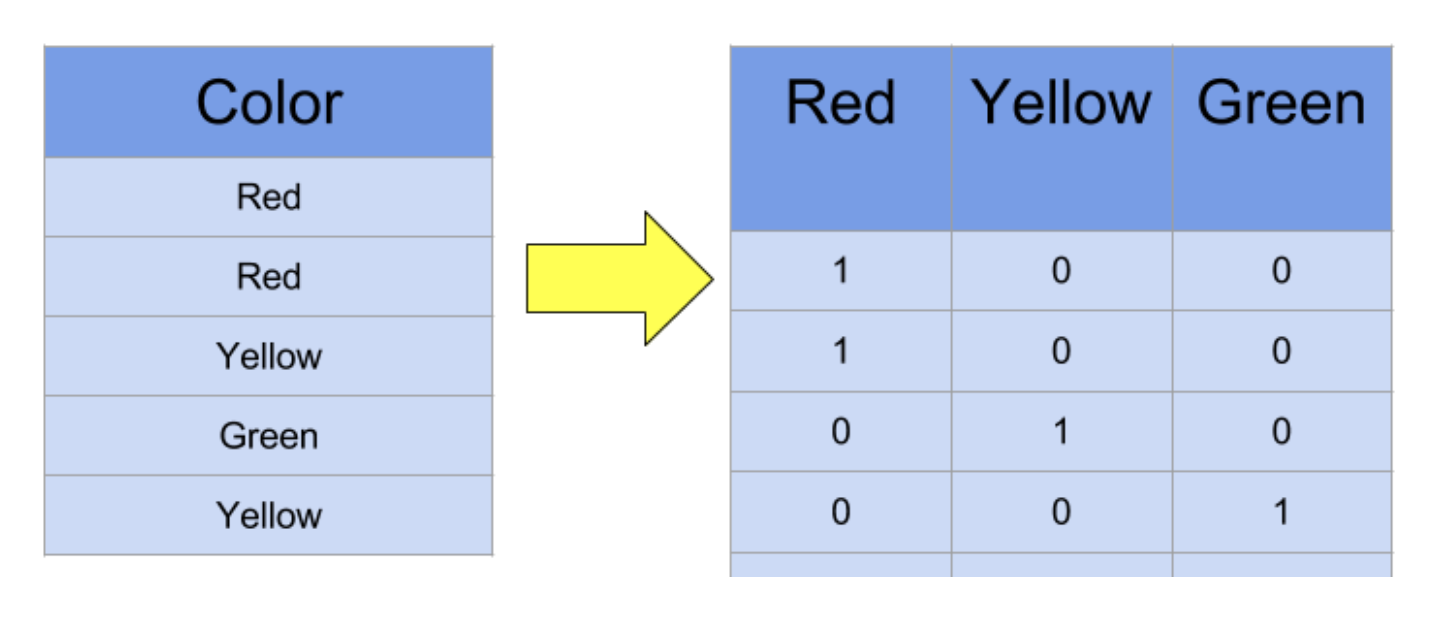

In [ ]:
def one_hot_encoder(data, non_ordinal):
    """
    Transforms non-ordinal categorical features to vectorized numeric features 
    :param 1 data: a DataFrame
    :param2 non_ordinal: non-ordinal categorical features
    :returns: a DataFrame of One Hot encoded categorical features
    """
    X_non = data[non_ordinal].copy()
    X_non = pd.get_dummies(X_non, columns = ['Race','Marital Status'])
    X_non['Estrogen Status'] = X_non['Estrogen Status'].apply(lambda x: 1 if x in ['Positive'] else 0)
    X_non['Progesterone Status'] = X_non['Progesterone Status'].apply(lambda x: 1 if x in ['Positive'] else 0)
    
    return X_non

In [ ]:
non_ordinal = ['Race', 'Marital Status', 'Estrogen Status', 'Progesterone Status']
X_train_non = one_hot_encoder(X_train, non_ordinal)
X_test_non = one_hot_encoder(X_test, non_ordinal)

## 3.3 Encoding Status
Transform the target label from categorical to numerical

In [ ]:
y_train_prepared =  y_train.apply(lambda x: 1 if x in ["Alive"] else 0)
y_test_prepared =  y_test.apply(lambda x: 1 if x in ["Alive"] else 0)

# 4 Save transformed data for model training

In [ ]:
def concat(X_num, X_ord, X_non):
    """
    Concatenate transformed features into a DataFrame
    :param 1 X_num: Scaled numeric features
    :param 2 X_ord: Label encoded ordinal categorical features
    :param 3 X_ord: One hot encoded non-ordinal categorical features
    :returns: a DataFrame of transformed features 
    """
    X_prepared = pd.concat([X_num, X_ord, X_non], axis=1)
    return X_prepared 

In [ ]:
X_train_prepared = concat(X_train_num, X_train_ord, X_train_non)
X_test_prepared = concat(X_test_num, X_test_ord, X_test_non)

In [ ]:
#save the transformed data into data/traintest folder

data_path = '...'

np.savetxt(data_path + "X_train_prepared.csv", X_train_prepared, delimiter=",")
np.savetxt(data_path + "X_test_prepared.csv", X_test_prepared, delimiter=",")
np.savetxt(data_path + "y_train_prepared.csv", y_train_prepared, delimiter=",")
np.savetxt(data_path + "y_test_prepared.csv", y_test_prepared, delimiter=",")

# Summary
* Split the dataset into training and testing data to avoid overfitting

* Standardize numeric features to a common scale without distorting the differences in the range of the values.

* Convert the categorical features to numeric values so that our model can interpret them.

* Concatenate the preprocessed features together into training and testing DataFrames for model developments. Preprocessing completed.

Now that you know how feature preprocessing works, head over to `03-model_development.ipynb`!